<a href="https://colab.research.google.com/github/AnggoroR/AnggoroR/blob/main/SKRIPSI_CODE_PROGRAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Link Dataset https://www.kaggle.com/datasets/hassan06/nslkdd

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn import metrics
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = '/content/drive/MyDrive/nsl-kdd/kdd_full.csv'
train_data = pd.read_csv(train, delimiter=';')

In [ ]:
train_data.rename(columns={'label': 'attack'}, inplace=True)
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.09,0.00,0.91,1.00,satan
148513,0,tcp,http,SF,254,2277,0,0,0,0,...,255,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,normal
148514,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
148515,0,tcp,private,RSTR,0,0,0,0,0,0,...,1,0.00,0.58,0.57,0.00,0.00,0.00,0.58,1.00,portsweep


## Check Missing Data

In [ ]:
print('Check kolom yang memiliki missing data:')
print(train_data.isnull().any())

Check kolom yang memiliki missing data:
duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                Fals

## Data Type Checking and Statistical Reports

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148517.0,282.850980,2.545220e+03,0.0,0.00,0.00,0.00,5.445100e+04
src_bytes,148517.0,40512.301521,5.409528e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,148517.0,17227.102850,3.703596e+06,0.0,0.00,0.00,527.00,1.309937e+09
land,148517.0,0.000182,1.348205e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148517.0,0.021822,2.484062e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148517.0,0.000121,1.467823e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148517.0,0.196994,2.087903e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,148517.0,0.002370,5.843706e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148517.0,0.397308,4.893424e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148517.0,0.276231,2.249076e+01,0.0,0.00,0.00,0.00,7.479000e+03


### Label

In [ ]:
#Jumlah dari label serangan sebelum labeling data
print(train_data['attack'].value_counts())

attack
normal             78588
neptune            47868
satan               4331
ipsweep             4078
portsweep           3302
smurf               3186
nmap                1699
back                1183
warezclient          997
teardrop             996
guess_passwd         464
mscan                310
warezmaster          299
pod                  236
apache2              228
processtable         211
snmpguess             99
mailbomb              94
saint                 93
buffer_overflow       47
snmpgetattack         43
httptunnel            41
land                  20
multihop              16
rootkit               14
loadmodule            13
imap                  13
ftp_write             10
ps                     9
sendmail               8
phf                    5
perl                   4
xlock                  4
xterm                  3
spy                    2
named                  2
xsnoop                 1
Name: count, dtype: int64


In [ ]:
def change_label(df):
  df.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
change_label(train_data)

In [ ]:
#Pendistribusian kelas label
print(train_data.attack.value_counts())

attack
normal    78588
Dos       54022
Probe     13813
R2L        2004
U2R          90
Name: count, dtype: int64


# **Data Preprocessing**


*   Untuk Binary and Multi-class Classification
*   **Label encoding** dengan One-Hot






## Binary Classification





In [ ]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.09,0.00,0.91,1.00,Probe
148513,0,tcp,http,SF,254,2277,0,0,0,0,...,255,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,normal
148514,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.07,0.00,0.00,1.00,1.00,0.00,0.00,Dos
148515,0,tcp,private,RSTR,0,0,0,0,0,0,...,1,0.00,0.58,0.57,0.00,0.00,0.00,0.58,1.00,Probe


In [ ]:
#Mengubah kelas label menjadi 2 kategori/kelas 'normal' and 'abnormal'
bin_label = pd.DataFrame(train_data.attack.map(lambda x:'normal' if x=='normal' else 'abnormal'))
print(bin_label.value_counts())

attack  
normal      78588
abnormal    69929
Name: count, dtype: int64


In [ ]:
#membuat dataframe dengan binary labels (normal,abnormal)
bin_data = train_data.copy()
bin_data['attack'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.09,0.00,0.91,1.00,abnormal
148513,0,tcp,http,SF,254,2277,0,0,0,0,...,255,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,normal
148514,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.07,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
148515,0,tcp,private,RSTR,0,0,0,0,0,0,...,1,0.00,0.58,0.57,0.00,0.00,0.00,0.58,1.00,abnormal


In [ ]:
#label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.09,0.00,0.91,1.00,abnormal,0
148513,0,tcp,http,SF,254,2277,0,0,0,0,...,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,normal,1
148514,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.07,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
148515,0,tcp,private,RSTR,0,0,0,0,0,0,...,0.00,0.58,0.57,0.00,0.00,0.00,0.58,1.00,abnormal,0


In [ ]:
bin_data_train = bin_data.copy()
bin_data_train.drop(labels= ['attack'], axis=1, inplace=True)
bin_data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.09,0.00,0.91,1.00,0
148513,0,tcp,http,SF,254,2277,0,0,0,0,...,255,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,1
148514,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
148515,0,tcp,private,RSTR,0,0,0,0,0,0,...,1,0.00,0.58,0.57,0.00,0.00,0.00,0.58,1.00,0


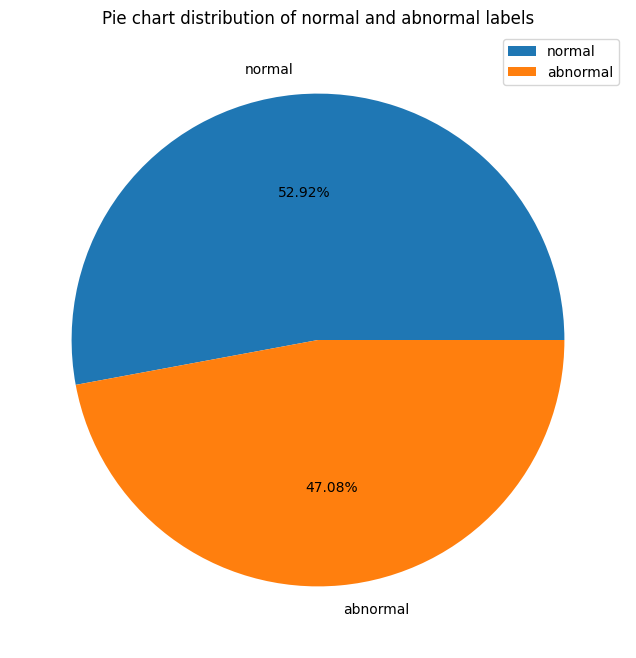

In [ ]:
#pie chart distribution untuk normal (1) and abnormal (0)labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.attack.value_counts(),labels=bin_data.attack.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [ ]:
#Membuat dataframe dengan hanya fitur numeric dari binary class dataset dan fitur encoded label untuk seleksi fitur
numeric_col = train_data.select_dtypes(include='number').columns
numeric_bin_data = train_data[numeric_col]
numeric_bin_data['intrusion'] = bin_data['intrusion']

<ipython-input-18-b409adfa8727>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin_data['intrusion'] = bin_data['intrusion']


In [ ]:
numeric_bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,0,0,0,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.09,0.00,0.91,1.00,0
148513,0,254,2277,0,0,0,0,0,1,0,...,255,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,1
148514,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
148515,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.58,0.57,0.00,0.00,0.00,0.58,1.00,0


## Multi-class Classification


In [ ]:
#Membuat dataframe dengan multiclass labels (Dos,Probe,R2L,U2R,normal)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.attack)
multi_label

,attack
0,normal
1,normal
2,Dos
3,normal
4,normal
...,...
148512,Probe
148513,normal
148514,Dos
148515,Probe


In [ ]:
#label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,4
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.09,0.00,0.91,1.00,Probe,1
148513,0,tcp,http,SF,254,2277,0,0,0,0,...,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,normal,4
148514,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.07,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
148515,0,tcp,private,RSTR,0,0,0,0,0,0,...,0.00,0.58,0.57,0.00,0.00,0.00,0.58,1.00,Probe,1


In [ ]:
#one-hot-encoding label
multi_data = pd.get_dummies(multi_data,columns=['attack'],prefix="",prefix_sep="")
multi_data['attack'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,0.05,0.00,4,False,False,False,False,True,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.00,0.00,4,False,False,False,False,True,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,1.00,0.00,0.00,0,True,False,False,False,False,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.01,0.00,0.01,4,False,False,False,False,True,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,4,False,False,False,False,True,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.91,1.00,1,False,True,False,False,False,Probe
148513,0,tcp,http,SF,254,2277,0,0,0,0,...,0.00,0.00,0.00,4,False,False,False,False,True,normal
148514,0,tcp,private,S0,0,0,0,0,0,0,...,1.00,0.00,0.00,0,True,False,False,False,False,Dos
148515,0,tcp,private,RSTR,0,0,0,0,0,0,...,0.00,0.58,1.00,1,False,True,False,False,False,Probe


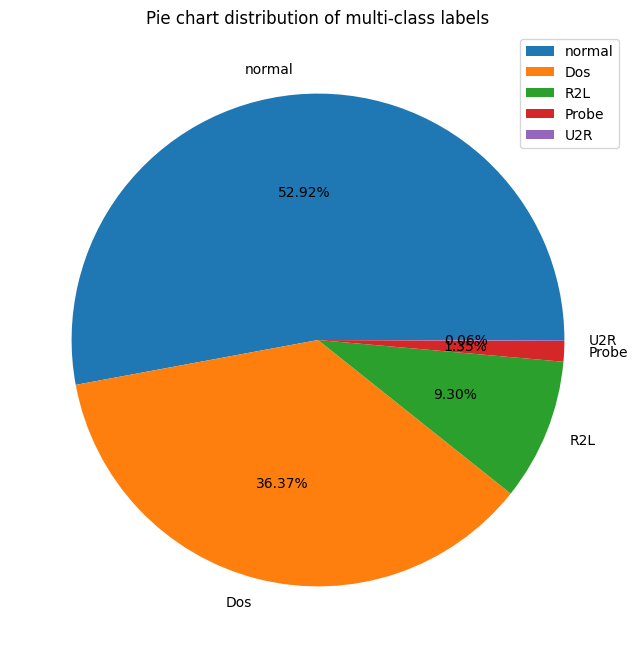

In [ ]:
#pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.attack.value_counts(),labels=multi_data.attack.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

In [ ]:
multi_data_train = multi_data.copy()
multi_data_train.drop(labels= ['attack', 'intrusion'], axis=1, inplace=True)
multi_data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Dos,Probe,R2L,U2R,normal
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,False,False,False,False,True
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,False,False,False,False,True
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,True,False,False,False,False
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.04,0.03,0.01,0.00,0.01,False,False,False,False,True
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.09,0.00,0.91,1.00,False,True,False,False,False
148513,0,tcp,http,SF,254,2277,0,0,0,0,...,0.04,0.00,0.00,0.00,0.00,False,False,False,False,True
148514,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,True,False,False,False,False
148515,0,tcp,private,RSTR,0,0,0,0,0,0,...,0.00,0.00,0.00,0.58,1.00,False,True,False,False,False


In [ ]:
#Membuat dataframe numeric untuk feature selection
numeric_multi_data = train_data[numeric_col]
numeric_multi_data['attack'] = multi_label
numeric_multi_data = pd.get_dummies(numeric_multi_data,columns=['attack'],prefix="",prefix_sep="")
numeric_multi_data

<ipython-input-25-c4033ae4b637>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi_data['attack'] = multi_label


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,False,False,False,False,True
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,False,False,False,False,True
2,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,True,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,0.04,0.03,0.01,0.00,0.01,False,False,False,False,True
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,0,0,0,0,0,0,0,0,0,...,0.00,0.09,0.00,0.91,1.00,False,True,False,False,False
148513,0,254,2277,0,0,0,0,0,1,0,...,0.04,0.00,0.00,0.00,0.00,False,False,False,False,True
148514,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,True,False,False,False,False
148515,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.58,1.00,False,True,False,False,False


# **Feature Selection**

In [ ]:
#dataset binary numeric
num_dataset_bin = numeric_bin_data.copy()
y_train_num_bin = num_dataset_bin[['intrusion']]
X_train_num_bin = num_dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_num_bin.shape,'\ny_train has shape:',y_train_num_bin.shape)

X_train has shape: (148517, 38) 
y_train has shape: (148517, 1)


In [ ]:
#dataset binary non-numeric
dataset_bin = bin_data_train.copy()
y_train_bin = dataset_bin[['intrusion']]
X_train_bin = dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_bin.shape,'\ny_train has shape:',y_train_bin.shape)

X_train has shape: (148517, 41) 
y_train has shape: (148517, 1)


In [ ]:
#dataset multiclass numeric
num_dataset_multi = numeric_multi_data.copy()
y_train_num_multi = num_dataset_multi.loc[:, 'Dos':]
X_train_num_multi = num_dataset_multi.loc[:, :'dst_host_srv_rerror_rate']

print('X_train has shape:',X_train_num_multi.shape,'\ny_train has shape:',y_train_num_multi.shape)

X_train has shape: (148517, 38) 
y_train has shape: (148517, 5)


In [ ]:
#dataset multiclass non-numeric
dataset_multi = multi_data_train.copy()
y_train_multi = dataset_multi.loc[:, 'Dos':]
X_train_multi = dataset_multi.loc[:, :'dst_host_srv_rerror_rate']

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (148517, 41) 
y_train has shape: (148517, 5)


### Chi Square

feature selection (binary classification)

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Menghitung chi-scores untuk semua fitur setelah mengisi nilai NaN
chi_scores = chi2(X_train_num_bin, y_train_num_bin)

# Membuat DataFrame untuk menyimpan fitur dan chi-scores
chi_scores_df = pd.DataFrame({
    'Feature': X_train_num_bin.columns,
    'Chi-Square Score': chi_scores[0],
    'p-value': chi_scores[1]
})

# Memeriksa dan mengatasi NaN dalam hasil chi-scores
if chi_scores_df['Chi-Square Score'].isna().sum() > 0:
    print("Ada nilai NaN dalam Chi-Square Score. Fitur-fitur yang menyebabkan masalah akan dihapus.")
    chi_scores_df = chi_scores_df.dropna()

# Mengurutkan DataFrame berdasarkan Chi-Square Score
chi_scores_df = chi_scores_df.sort_values(by='Chi-Square Score', ascending=True)
chi_scores_df

Ada nilai NaN dalam Chi-Square Score. Fitur-fitur yang menyebabkan masalah akan dihapus.


,Feature,Chi-Square Score,p-value
17,is_host_login,6.821689e-03,9.341748e-01
5,urgent,5.036758e-02,8.224249e-01
3,land,7.893752e+00,4.960585e-03
14,num_shells,1.159800e+01,6.602281e-04
10,root_shell,4.342886e+01,4.396567e-11
7,num_failed_logins,6.119922e+01,5.158199e-15
18,is_guest_login,8.847523e+01,5.147545e-21
11,su_attempted,1.412853e+02,1.393670e-32
33,dst_host_srv_diff_host_rate,2.038788e+02,2.974600e-46
15,num_access_files,4.446534e+02,1.051244e-98


In [ ]:
imputer = SimpleImputer(strategy="mean")
X_train_num_bin_imputed = imputer.fit_transform(X_train_num_bin)

y_train_num_bin_imputed = y_train_num_bin.fillna(y_train_num_bin.mean())

chi_scores = chi2(X_train_num_bin_imputed, y_train_num_bin_imputed)

p_values = pd.Series(chi_scores[1], index=X_train_num_bin.columns)
p_values_df = pd.DataFrame({'Feature': X_train_num_bin.columns, 'p-Value': chi_scores[1]})

p_values_df['p-Value'].fillna(1, inplace=True)

p_values_df.sort_values(by='p-Value', ascending=False, inplace=True)
p_values_df

,Feature,p-Value
16,num_outbound_cmds,1.000000e+00
17,is_host_login,9.341748e-01
5,urgent,8.224249e-01
3,land,4.960585e-03
14,num_shells,6.602281e-04
10,root_shell,4.396567e-11
7,num_failed_logins,5.158199e-15
18,is_guest_login,5.147545e-21
11,su_attempted,1.393670e-32
33,dst_host_srv_diff_host_rate,2.974600e-46


In [ ]:
# select 20 best features
p_values_df.sort_values(by='p-Value', ascending=True, inplace=True)
top_20_features = p_values_df.head(20)
top_20_features

,Feature,p-Value
28,dst_host_count,0.0
34,dst_host_serror_rate,0.0
35,dst_host_srv_serror_rate,0.0
36,dst_host_rerror_rate,0.0
27,srv_diff_host_rate,0.0
19,count,0.0
25,same_srv_rate,0.0
24,srv_rerror_rate,0.0
23,rerror_rate,0.0
22,srv_serror_rate,0.0


In [ ]:
# Mengisi nilai NaN pada dataset dengan nilai rata-rata (atau metode lain yang sesuai)
imputer = SimpleImputer(strategy="mean")
X_train_num_bin_imputed = imputer.fit_transform(X_train_num_bin)

# Memastikan bahwa y_train_num_bin tidak mengandung nilai NaN
y_train_num_bin_imputed = y_train_num_bin.fillna(y_train_num_bin.mean())

# Seleksi fitur menggunakan chi-square setelah mengisi nilai NaN
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X_train_num_bin_imputed, y_train_num_bin_imputed)

# Membuat DataFrame untuk menyimpan fitur dan chi-scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_num_bin.columns)

# Menggabungkan dua DataFrame untuk visualisasi yang lebih baik
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']  # Menamai kolom DataFrame

# Menangani nilai NaN dalam hasil chi-scores
if featureScores['Score'].isna().sum() > 0:
    print("Ada nilai NaN dalam Score. Nilai tersebut akan diganti dengan 0.")
    featureScores['Score'].fillna(0, inplace=True)

featureScores

Ada nilai NaN dalam Score. Nilai tersebut akan diganti dengan 0.


,Features,Score
0,duration,7.979138e+06
1,src_bytes,3.134419e+09
2,dst_bytes,1.602881e+09
3,land,7.893752e+00
4,wrong_fragment,3.461960e+03
5,urgent,5.036758e-02
6,hot,4.552200e+02
7,num_failed_logins,6.119922e+01
8,logged_in,4.154644e+04
9,num_compromised,3.071821e+04


In [ ]:
data_chi2_20best = pd.DataFrame(featureScores.nlargest(20,'Score'))
data_chi2_20best

,Features,Score
1,src_bytes,3.134419e+09
2,dst_bytes,1.602881e+09
0,duration,7.979138e+06
29,dst_host_srv_count,7.944931e+06
19,count,7.373749e+06
28,dst_host_count,1.120284e+06
35,dst_host_srv_serror_rate,4.319645e+04
22,srv_serror_rate,4.198924e+04
21,serror_rate,4.189836e+04
34,dst_host_serror_rate,4.168451e+04


In [ ]:
data_chi2_20best = list(data_chi2_20best['Features'])

In [ ]:
Chi2_dataset = X_train_num_bin[data_chi2_20best]
Chi2_dataset

,src_bytes,dst_bytes,duration,dst_host_srv_count,count,dst_host_count,dst_host_srv_serror_rate,srv_serror_rate,serror_rate,dst_host_serror_rate,logged_in,num_root,num_compromised,dst_host_same_srv_rate,same_srv_rate,srv_rerror_rate,rerror_rate,dst_host_srv_rerror_rate,dst_host_rerror_rate,dst_host_diff_srv_rate
0,491,0,0,25,2,150,0.00,0.0,0.00,0.00,0,0,0,0.17,1.00,0.0,0.00,0.00,0.05,0.03
1,146,0,0,1,13,255,0.00,0.0,0.00,0.00,0,0,0,0.00,0.08,0.0,0.00,0.00,0.00,0.60
2,0,0,0,26,123,255,1.00,1.0,1.00,1.00,0,0,0,0.10,0.05,0.0,0.00,0.00,0.00,0.05
3,232,8153,0,255,5,30,0.01,0.2,0.20,0.03,1,0,0,1.00,1.00,0.0,0.00,0.01,0.00,0.00
4,199,420,0,255,30,255,0.00,0.0,0.00,0.00,1,0,0,1.00,1.00,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,0,0,1,395,255,0.00,0.0,0.06,0.09,0,0,0,0.00,0.00,1.0,0.93,1.00,0.91,1.00
148513,254,2277,0,255,2,27,0.00,0.0,0.00,0.00,1,0,0,1.00,1.00,0.0,0.00,0.00,0.00,0.00
148514,0,0,0,25,202,255,1.00,1.0,1.00,1.00,0,0,0,0.10,0.05,0.0,0.00,0.00,0.00,0.07
148515,0,0,0,1,2,255,0.00,0.0,0.00,0.00,0,0,0,0.00,0.50,1.0,0.50,1.00,0.58,0.58


### Chi Square

feature selection (multiclass classification)

In [ ]:
# Menghitung chi-scores untuk semua fitur setelah mengisi nilai NaN
chi_scores_multi = chi2(X_train_num_multi, y_train_num_multi)

# Membuat DataFrame untuk menyimpan fitur dan chi-scores
chi_scores_df_multi = pd.DataFrame({
    'Feature': X_train_num_multi.columns,
    'Chi-Square Score': chi_scores_multi[0],
    'p-value': chi_scores_multi[1]
})

# Memeriksa dan mengatasi NaN dalam hasil chi-scores
if chi_scores_df_multi['Chi-Square Score'].isna().sum() > 0:
    print("Ada nilai NaN dalam Chi-Square Score. Fitur-fitur yang menyebabkan masalah akan dihapus.")
    chi_scores_df_multi = chi_scores_df_multi.dropna()

# Mengurutkan DataFrame berdasarkan Chi-Square Score
chi_scores_df_multi = chi_scores_df_multi.sort_values(by='Chi-Square Score', ascending=True)
chi_scores_df_multi

Ada nilai NaN dalam Chi-Square Score. Fitur-fitur yang menyebabkan masalah akan dihapus.


,Feature,Chi-Square Score,p-value
3,land,1.715848e+01,1.800588e-03
17,is_host_login,3.600005e+01,2.893630e-07
11,su_attempted,1.417269e+02,1.204753e-29
15,num_access_files,7.482470e+02,1.242829e-160
5,urgent,1.525209e+03,0.000000e+00
14,num_shells,4.775343e+03,0.000000e+00
4,wrong_fragment,5.435356e+03,0.000000e+00
13,num_file_creations,8.166008e+03,0.000000e+00
7,num_failed_logins,1.116583e+04,0.000000e+00
26,diff_srv_rate,1.132213e+04,0.000000e+00


In [ ]:
imputer_multi = SimpleImputer(strategy="mean")
X_train_num_multi_imputed = imputer_multi.fit_transform(X_train_num_multi)

y_train_num_multi_imputed = y_train_num_multi.fillna(y_train_num_multi.mean())

chi_scores_multi = chi2(X_train_num_multi_imputed, y_train_num_multi_imputed)

p_values_multi = pd.Series(chi_scores_multi[1], index=X_train_num_multi.columns)
p_values_multi_df = pd.DataFrame({'Feature': X_train_num_multi.columns, 'p-Value': chi_scores_multi[1]})

p_values_multi_df['p-Value'].fillna(1, inplace=True)

p_values_multi_df.sort_values(by='p-Value', ascending=False, inplace=True)
p_values_multi_df

,Feature,p-Value
16,num_outbound_cmds,1.000000e+00
3,land,1.800588e-03
17,is_host_login,2.893630e-07
11,su_attempted,1.204753e-29
15,num_access_files,1.242829e-160
0,duration,0.000000e+00
24,srv_rerror_rate,0.000000e+00
25,same_srv_rate,0.000000e+00
26,diff_srv_rate,0.000000e+00
27,srv_diff_host_rate,0.000000e+00


In [ ]:
# select 20 best features
p_values_multi_df.sort_values(by='p-Value', ascending=True, inplace=True)
top_20_multi_features = p_values_multi_df.head(20)
top_20_multi_features

,Feature,p-Value
35,dst_host_srv_serror_rate,0.0
19,count,0.0
21,serror_rate,0.0
20,srv_count,0.0
1,src_bytes,0.0
18,is_guest_login,0.0
14,num_shells,0.0
13,num_file_creations,0.0
12,num_root,0.0
10,root_shell,0.0


In [ ]:
# Mengisi nilai NaN pada dataset dengan nilai rata-rata (atau metode lain yang sesuai)
imputer_multi = SimpleImputer(strategy="mean")
X_train_num_multi_imputed = imputer_multi.fit_transform(X_train_num_multi)

# Memastikan bahwa y_train_num_multi tidak mengandung nilai NaN
y_train_num_multi_imputed = y_train_num_multi.fillna(y_train_num_multi.mean())

# Seleksi fitur menggunakan chi-square setelah mengisi nilai NaN
bestfeatures_multi = SelectKBest(score_func=chi2, k=20)
fit_multi = bestfeatures_multi.fit(X_train_num_multi_imputed, y_train_num_multi_imputed)

# Membuat DataFrame untuk menyimpan fitur dan chi-scores
dfscores_multi = pd.DataFrame(fit_multi.scores_)
dfcolumns_multi = pd.DataFrame(X_train_num_multi.columns)

# Menggabungkan dua DataFrame untuk visualisasi yang lebih baik
featureScores_multi = pd.concat([dfcolumns_multi, dfscores_multi], axis=1)
featureScores_multi.columns = ['Features', 'Score']  # Menamai kolom DataFrame

# Menangani nilai NaN dalam hasil chi-scores
if featureScores_multi['Score'].isna().sum() > 0:
    print("Ada nilai NaN dalam Score. Nilai tersebut akan diganti dengan 0.")
    featureScores_multi['Score'].fillna(0, inplace=True)

featureScores_multi

Ada nilai NaN dalam Score. Nilai tersebut akan diganti dengan 0.


,Features,Score
0,duration,1.507981e+08
1,src_bytes,3.268806e+10
2,dst_bytes,1.650911e+10
3,land,1.715848e+01
4,wrong_fragment,5.435356e+03
5,urgent,1.525209e+03
6,hot,2.219894e+05
7,num_failed_logins,1.116583e+04
8,logged_in,4.399474e+04
9,num_compromised,3.696065e+04


In [ ]:
data_chi2_multi_20best = pd.DataFrame(featureScores_multi.nlargest(20,'Score'))
data_chi2_multi_20best

,Features,Score
1,src_bytes,3.268806e+10
2,dst_bytes,1.650911e+10
0,duration,1.507981e+08
19,count,9.164052e+06
29,dst_host_srv_count,7.997786e+06
28,dst_host_count,1.793426e+06
20,srv_count,2.451530e+05
6,hot,2.219894e+05
35,dst_host_srv_serror_rate,6.442066e+04
22,srv_serror_rate,6.304869e+04


In [ ]:
data_chi2_multi_20best = list(data_chi2_multi_20best['Features'])

In [ ]:
Chi2_multi_dataset = X_train_num_multi[data_chi2_multi_20best]
Chi2_multi_dataset

,src_bytes,dst_bytes,duration,count,dst_host_srv_count,dst_host_count,srv_count,hot,dst_host_srv_serror_rate,srv_serror_rate,serror_rate,dst_host_serror_rate,logged_in,num_root,num_compromised,dst_host_same_srv_rate,same_srv_rate,dst_host_same_src_port_rate,dst_host_diff_srv_rate,srv_rerror_rate
0,491,0,0,2,25,150,2,0,0.00,0.0,0.00,0.00,0,0,0,0.17,1.00,0.17,0.03,0.0
1,146,0,0,13,1,255,1,0,0.00,0.0,0.00,0.00,0,0,0,0.00,0.08,0.88,0.60,0.0
2,0,0,0,123,26,255,6,0,1.00,1.0,1.00,1.00,0,0,0,0.10,0.05,0.00,0.05,0.0
3,232,8153,0,5,255,30,5,0,0.01,0.2,0.20,0.03,1,0,0,1.00,1.00,0.03,0.00,0.0
4,199,420,0,30,255,255,32,0,0.00,0.0,0.00,0.00,1,0,0,1.00,1.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,0,0,395,1,255,1,0,0.00,0.0,0.06,0.09,0,0,0,0.00,0.00,0.00,1.00,1.0
148513,254,2277,0,2,255,27,2,0,0.00,0.0,0.00,0.00,1,0,0,1.00,1.00,0.04,0.00,0.0
148514,0,0,0,202,25,255,10,0,1.00,1.0,1.00,1.00,0,0,0,0.10,0.05,0.00,0.07,0.0
148515,0,0,0,2,1,255,1,0,0.00,0.0,0.00,0.00,0,0,0,0.00,0.50,0.57,0.58,1.0


# **Data Standardization**








In [ ]:
# Standardizing data setelah feature selection
def standardize_selected_features(df, features):
    scaler = StandardScaler()
    df[features] = scaler.fit_transform(df[features])
    return df

In [ ]:
# Standardize top 20 features untuk binary classification
X_train_bin_top20 = X_train_num_bin_imputed[:, [X_train_num_bin.columns.get_loc(c) for c in data_chi2_20best]]
X_train_bin_top20 = pd.DataFrame(X_train_bin_top20, columns=data_chi2_20best)
X_train_bin_top20 = standardize_selected_features(X_train_bin_top20, data_chi2_20best)

In [ ]:
# Standardize top 20 features untuk multi-class classification
X_train_multi_top20 = X_train_num_multi_imputed[:, [X_train_num_multi.columns.get_loc(c) for c in data_chi2_multi_20best]]
X_train_multi_top20 = pd.DataFrame(X_train_multi_top20, columns=data_chi2_multi_20best)
X_train_multi_top20 = standardize_selected_features(X_train_multi_top20, data_chi2_multi_20best)

In [ ]:
# Function to display standardized data
def display_standardized_data():
    print("Standardized Data for Binary Classification (Top 20 Features):")
    print(X_train_bin_top20.head())

    print("\nStandardized Data for Multi-Class Classification (Top 20 Features):")
    print(X_train_multi_top20.head())

# Call the function to display the standardized data
display_standardized_data()

Standardized Data for Binary Classification (Top 20 Features):
   src_bytes  dst_bytes  duration  dst_host_srv_count     count  \
0  -0.007398  -0.004651 -0.111131           -0.827905 -0.711671   
1  -0.007462  -0.004651 -0.111131           -1.044379 -0.616257   
2  -0.007489  -0.004651 -0.111131           -0.818885  0.337880   
3  -0.007446  -0.002450 -0.111131            1.246640 -0.685649   
4  -0.007452  -0.004538 -0.111131            1.246640 -0.468800   

   dst_host_count  dst_host_srv_serror_rate  srv_serror_rate  serror_rate  \
0       -0.332108                 -0.613050        -0.619667    -0.624680   
1        0.728880                 -0.613050        -0.619667    -0.624680   
2        0.728880                  1.653504         1.637821     1.635995   
3       -1.544667                 -0.590384        -0.168170    -0.172545   
4        0.728880                 -0.613050        -0.619667    -0.624680   

   dst_host_serror_rate  logged_in  num_root  num_compromised  \
0     

In [ ]:
# Extracting features (X) and labels (y)
y_bin = y_train_bin
y_multi = y_train_multi

## Binary Classification

In [ ]:
#splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train_bin_top20, y_bin, test_size=0.2, random_state=42)

In [ ]:
# Mengetahui shape dari X_train dan y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (118813, 20)
Shape of y_train: (118813, 1)
Shape of X_test: (29704, 20)
Shape of y_test: (29704, 1)


In [ ]:
# Pastikan semua tipe data konsisten (numpy array)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Random Forest

In [ ]:
#Membuat model Random Forest
model_bin = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_depth=10, random_state=42)

model_bin.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Evaluasi pada data pelatihan
y_train_pred_bin = model_bin.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred_bin) * 100
print("Random Forest Classifier Train Accuracy: ",train_accuracy)

Random Forest Classifier Train Accuracy:  99.2778568001818


In [ ]:
y_pred_bin = model_bin.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_bin)*100
print("Random Forest Classifier Test Accuracy: ",test_accuracy)

Random Forest Classifier Test Accuracy:  99.12806356046325


In [ ]:
#classification report
print(classification_report(y_test, y_pred_bin,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       1.00      0.98      0.99     13941
      normal       0.99      1.00      0.99     15763

    accuracy                           0.99     29704
   macro avg       0.99      0.99      0.99     29704
weighted avg       0.99      0.99      0.99     29704



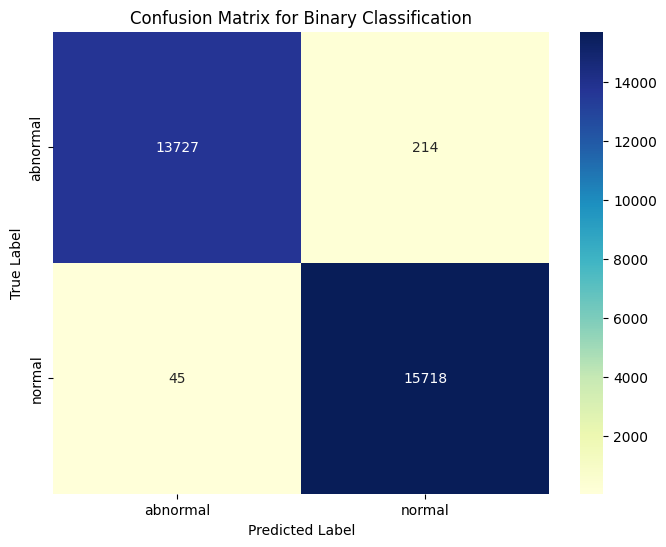

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_bin)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le1.classes_, yticklabels=le1.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Binary Classification')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

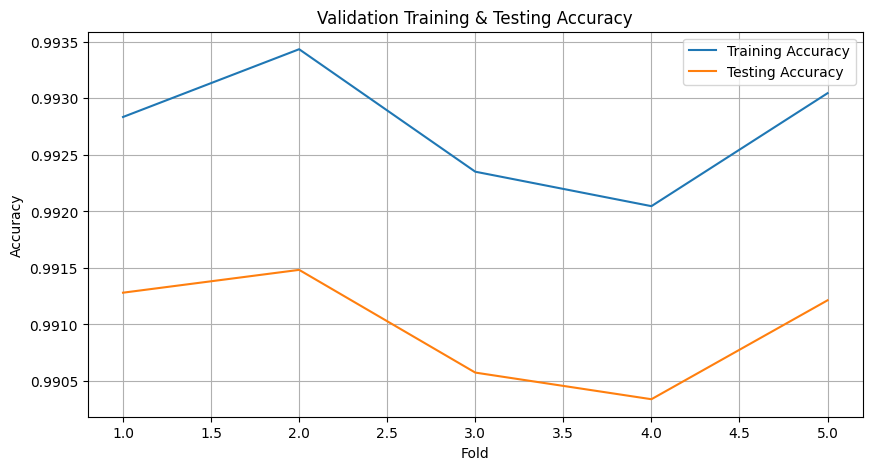

In [ ]:
# K-Fold Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_accuracies = []
val_accuracies = []
test_accuracies = []

for train_index, val_index in kf.split(X_train, y_train):
    X_kf_train, X_kf_val = X_train[train_index], X_train[val_index]
    y_kf_train, y_kf_val = y_train[train_index], y_train[val_index]

    model_bin.fit(X_kf_train, y_kf_train)

    y_kf_train_pred = model_bin.predict(X_kf_train)
    y_kf_val_pred = model_bin.predict(X_kf_val)
    y_kf_test_pred = model_bin.predict(X_test)

    train_accuracy = accuracy_score(y_kf_train, y_kf_train_pred)
    val_accuracy = accuracy_score(y_kf_val, y_kf_val_pred)
    test_accuracy = accuracy_score(y_test, y_kf_test_pred)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting hasil validation
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Testing Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Validation Training & Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# import joblib

# # Simpan model ke file
# joblib.dump(model_bin, 'model_bin.pkl')
# print("Model has been trained and saved to model_bin.pkl")

In [ ]:
# # Download file
# from google.colab import files
# files.download('model_bin.pkl')

## Multi-class Classification

### Random Forest Classifier (Multi-class Classification)

In [ ]:
#splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train_multi_top20, y_multi, test_size=0.2, random_state=42)

In [ ]:
# Mengetahui shape dari X_train dan y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (118813, 20)
Shape of y_train: (118813, 5)
Shape of X_test: (29704, 20)
Shape of y_test: (29704, 5)


In [ ]:
# Pastikan semua tipe data konsisten (numpy array)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
#Membuat model Random Forest
model_multi = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_split=2, min_samples_leaf=1, max_depth=10, random_state=42)

#Melatih model pada dataset pelatihan
model_multi.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [ ]:
# Evaluasi pada data pelatihan
y_train_pred_multi = model_multi.predict(X_train)
train_accuracy_multi = accuracy_score(y_train, y_train_pred_multi) * 100
print("Random Forest Classifier Train Accuracy: ",train_accuracy_multi)

Random Forest Classifier Train Accuracy:  99.1288832030165


In [ ]:
y_pred_multi = model_multi.predict(X_test)
test_accuracy_multi = accuracy_score(y_test, y_pred_multi)*100
print("Random Forest Classifier Multi-Class Set-Accuracy is ",test_accuracy_multi)

Random Forest Classifier Multi-Class Set-Accuracy is  98.97320226232156


In [ ]:
#classification report
print(classification_report(y_test, y_pred_multi, target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       1.00      0.99      1.00     10814
       Probe       0.99      0.98      0.98      2669
         R2L       0.98      0.71      0.83       440
         U2R       1.00      0.22      0.36        18
      normal       0.99      1.00      0.99     15763

   micro avg       0.99      0.99      0.99     29704
   macro avg       0.99      0.78      0.83     29704
weighted avg       0.99      0.99      0.99     29704
 samples avg       0.99      0.99      0.99     29704



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


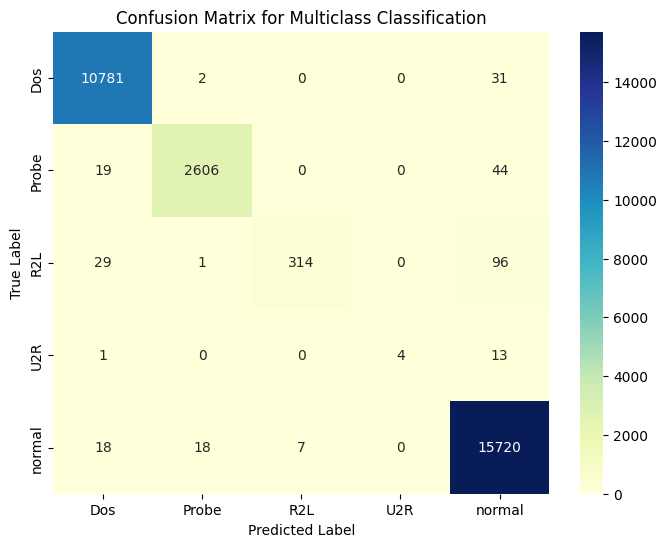

In [ ]:
# Asumsikan y_test_multi dan y_pred_multi sudah didefinisikan dan bisa untuk one-hot encoded
if y_test.ndim > 1:  # cek if it's one-hot encoded
    y_test_labels = np.argmax(y_test, axis=1)
    y_pred_labels = np.argmax(y_pred_multi, axis=1)
else:
    y_test_labels = y_test
    y_pred_labels = y_pred_multi

# Kalkulasi Confusion Matrix
conf_matrix_multi = confusion_matrix(y_test_labels, y_pred_labels)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_multi, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le2.classes_, yticklabels=le2.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Multiclass Classification')
plt.show()

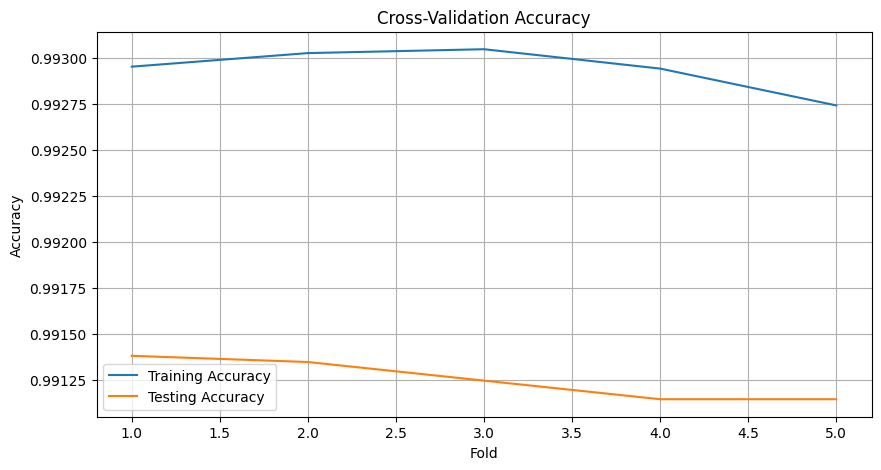

In [ ]:
# K-Fold Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Ubah y_train ke format multiclass (asumsikan sudah di one-hot encode)
y_train_multiclass = np.argmax(y_train.values, axis=1)

for train_index, val_index in kf.split(X_train, y_train_multiclass):
    X_kf_train, X_kf_val = X_train[train_index], X_train[val_index]
    y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]

    y_kf_train_np = np.argmax(y_kf_train.values, axis=1)
    y_kf_val_np = np.argmax(y_kf_val.values, axis=1)

    model_multi.fit(X_kf_train, y_kf_train_np)

    y_kf_train_pred = model_multi.predict(X_kf_train)
    y_kf_val_pred = model_multi.predict(X_kf_val)
    y_kf_test_pred = model_multi.predict(X_test)

    train_accuracy = accuracy_score(y_kf_train_np, y_kf_train_pred)
    val_accuracy = accuracy_score(y_kf_val_np, y_kf_val_pred)
    test_accuracy = accuracy_score(y_test_labels, y_kf_test_pred)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting hasil validation
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Testing Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# import joblib

# # Simpan model ke file
# joblib.dump(model_multi, 'model_multi.pkl')

In [ ]:
# # Download file
# from google.colab import files
# files.download('model_multi.pkl')

In [ ]:
# # Menghitung akurasi untuk setiap kelas
# class_multi_accuracies = conf_matrix_multi.diagonal() / conf_matrix_multi.sum(axis=1)

# # Menghitung precision, recall, dan f1-score untuk setiap kelas
# class_multi_precision = precision_score(y_test, y_pred_multi, average=None)
# class_multi_recall = recall_score(y_test, y_pred_multi, average=None)
# class_multi_f1 = f1_score(y_test, y_pred_multi, average=None)

# # Membuat DataFrame untuk hasil
# metrics_multi_df = pd.DataFrame({
#     'Class': le2.classes_,
#     'Accuracy': class_multi_accuracies * 100,
#     'Precision': class_multi_precision * 100,
#     'Recall': class_multi_recall * 100,
#     'F1-Score': class_multi_f1 * 100
# })

# # Menampilkan hasil
# print(metrics_multi_df.to_string(index=False, formatters={'Accuracy': '{:.2f}%'.format, 'Precision': '{:.2f}%'.format, 'Recall': '{:.2f}%'.format, 'F1-Score': '{:.2f}%'.format}))

In [ ]:
# # Assuming X_train, X_test, y_train, y_test are already defined

# # Checking the type of X_train
# if isinstance(X_train, np.ndarray):
#     print("X_train is a numpy array.")
# elif isinstance(X_train, pd.DataFrame):
#     print("X_train is a pandas DataFrame.")
# else:
#     print("X_train is neither a numpy array nor a pandas DataFrame.")

# # Checking the type of X_test
# if isinstance(X_test, np.ndarray):
#     print("X_test is a numpy array.")
# elif isinstance(X_test, pd.DataFrame):
#     print("X_test is a pandas DataFrame.")
# else:
#     print("X_test is neither a numpy array nor a pandas DataFrame.")

# # Checking the type of y_train
# if isinstance(y_train, np.ndarray):
#     print("y_train is a numpy array.")
# elif isinstance(y_train, pd.Series):
#     print("y_train is a pandas Series.")
# else:
#     print("y_train is neither a numpy array nor a pandas Series.")

# # Checking the type of y_test
# if isinstance(y_test, np.ndarray):
#     print("y_test is a numpy array.")
# elif isinstance(y_test, pd.Series):
#     print("y_test is a pandas Series.")
# else:
#     print("y_test is neither a numpy array nor a pandas Series.")

In [ ]:
# print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
# print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
# print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
# print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
# precision = precision_score(y_test, y_pred_bin, pos_label=1)*100
# recall = recall_score(y_test, y_pred_bin, pos_label=1)*100
# f1 = f1_score(y_test, y_pred_bin, pos_label=1) * 100
# print("Precision is ",precision)
# print("Recall is ",recall)
# print("F1-Score is ",f1)

In [ ]:
# # Menghitung akurasi untuk setiap kelas
# class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# # Menghitung precision, recall, dan f1-score untuk setiap kelas
# class_precision = precision_score(y_test, y_pred_bin, average=None)
# class_recall = recall_score(y_test, y_pred_bin, average=None)
# class_f1 = f1_score(y_test, y_pred_bin, average=None)

# # Membuat DataFrame untuk hasil
# metrics_df = pd.DataFrame({
#     'Class': le1.classes_,
#     'Accuracy': class_accuracies * 100,
#     'Precision': class_precision * 100,
#     'Recall': class_recall * 100,
#     'F1-Score': class_f1 * 100
# })

# # Menampilkan hasil
# print(metrics_df.to_string(index=False, formatters={'Accuracy': '{:.2f}%'.format, 'Precision': '{:.2f}%'.format, 'Recall': '{:.2f}%'.format, 'F1-Score': '{:.2f}%'.format}))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

# #Membuat model Random Forest
# model_multi = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_split=2, min_samples_leaf=1, max_depth=10)

# #Melatih model pada dataset pelatihan
# model_multi.fit(X_train, y_train)

# # Evaluasi pada data pelatihan
# y_train_pred_multi = model_multi.predict(X_train)
# train_accuracy_multi = accuracy_score(y_train, y_train_pred_multi) * 100
# print("Random Forest Classifier Train Accuracy: ", train_accuracy_multi)

# y_pred_multi = model_multi.predict(X_test)
# test_accuracy_multi = accuracy_score(y_test, y_pred_multi)*100
# print("Random Forest Classifier Multi-Class Set-Accuracy is ", test_accuracy_multi)

# #classification report
# print(classification_report(y_test, y_pred_multi,target_names=le2.classes_))